In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso

In [2]:
df=pd.read_csv('rq1_cleaned_no_ae.csv')
df.shape

(20593, 109)

In [3]:
df.columns
df=df.drop(['EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round2'].notnull()]  # for example


In [4]:
full = df_linear.copy()

In [5]:
X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.041
Test R²: 0.448
                    Feature  Coefficient
0               EQ5D_Round1     0.152615
3                occupation     0.022924
38        diag_Chronic pain    -0.020858
41        diag_Fibromyalgia    -0.018575
89           Linalool (PPM)     0.018503
96           Humulene (PPM)    -0.016492
80       alpha-Pinene (PPM)     0.016430
99     Total terpene (%w/w)     0.015769
42  diag_Multiple sclerosis    -0.015225
1                       Age    -0.015078


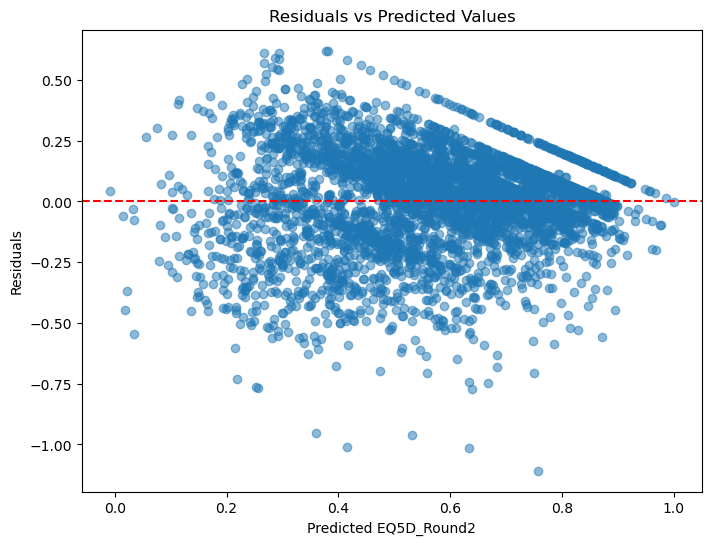

In [19]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round2")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [25]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.041
Test R²: 0.448
                    Feature  Coefficient
0               EQ5D_Round1     0.152601
3                occupation     0.022924
38        diag_Chronic pain    -0.020854
41        diag_Fibromyalgia    -0.018572
89           Linalool (PPM)     0.018478
80       alpha-Pinene (PPM)     0.016399
96           Humulene (PPM)    -0.016379
99     Total terpene (%w/w)     0.015706
42  diag_Multiple sclerosis    -0.015223
1                       Age    -0.015077


In [27]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.041
Test R²: 0.449
                                Feature  Coefficient
0                           EQ5D_Round1     0.153669
3                            occupation     0.022068
38                    diag_Chronic pain    -0.016144
41                    diag_Fibromyalgia    -0.015683
1                                   Age    -0.015368
42              diag_Multiple sclerosis    -0.012517
27                                  VTE    -0.007616
71                            form_Flos     0.007606
43                diag_Neuropathic pain    -0.006887
58  diag_Complex regional pain syndrome    -0.006660
Test MSE: 0.04102007461657698


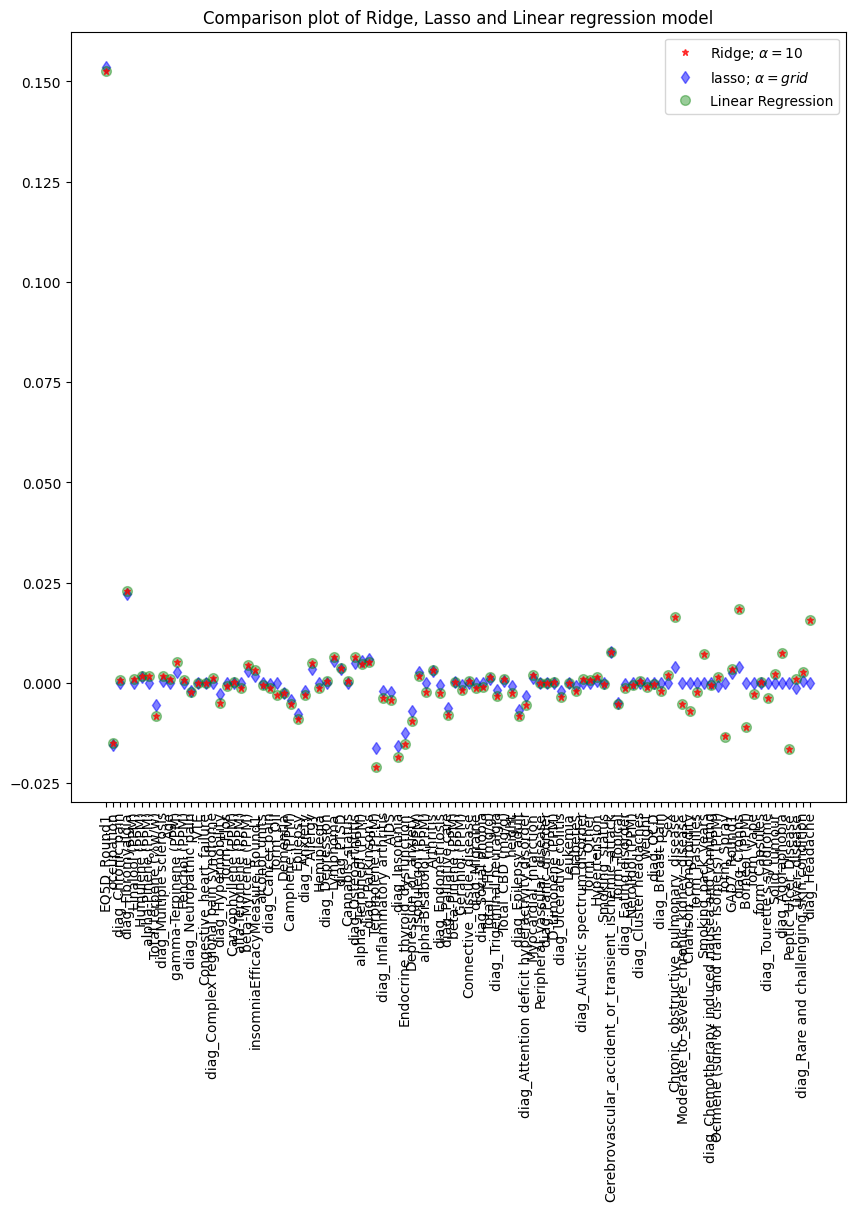

In [18]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()


In [46]:
df.columns
df=df.drop(['EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round3'].notnull()]  
df_linear= df_linear[df_linear['EQ5D_Round2'].notnull()]  

In [47]:
full=df_linear.copy()

In [48]:
X=full.drop(['EQ5D_Round3','SID'], axis=1)
y=full['EQ5D_Round3']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
## Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

features = coef_df['Feature'].values


Test MSE: 0.031
Test R²: 0.586
                  Feature  Coefficient
1             EQ5D_Round2     0.147467
0             EQ5D_Round1     0.061177
97         Humulene (PPM)     0.026689
96    Caryophyllene (PPM)    -0.017835
4              occupation     0.015543
100  Total terpene (%w/w)    -0.015205
72              form_Flos     0.009293
82         Camphene (PPM)     0.008681
81     alpha-Pinene (PPM)    -0.007937
79       Total_THC (mg/g)     0.007522


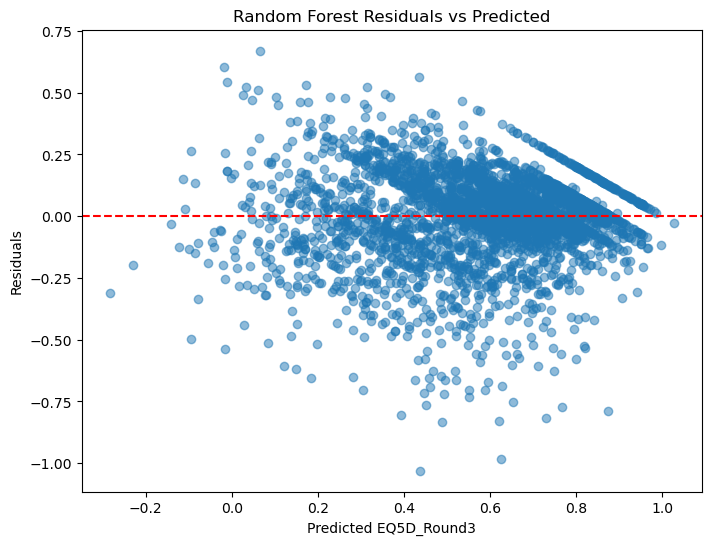

In [51]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round3")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals vs Predicted")
plt.show()


In [25]:
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))


Test MSE: 0.031
Test R²: 0.586
                  Feature  Coefficient
1             EQ5D_Round2     0.147451
0             EQ5D_Round1     0.061179
97         Humulene (PPM)     0.026416
96    Caryophyllene (PPM)    -0.017667
4              occupation     0.015544
100  Total terpene (%w/w)    -0.015026
72              form_Flos     0.009274
82         Camphene (PPM)     0.008633
81     alpha-Pinene (PPM)    -0.007970
79       Total_THC (mg/g)     0.007497


In [26]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")

## print the coefficients of highest absolute value for coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

print(f"Test MSE: {mse}")

Test MSE: 0.031
Test R²: 0.587
                                          Feature  Coefficient
1                                     EQ5D_Round2     0.147922
0                                     EQ5D_Round1     0.061812
4                                      occupation     0.014788
39                              diag_Chronic pain    -0.006251
42                              diag_Fibromyalgia    -0.005866
2                                             Age    -0.005764
72                                      form_Flos     0.004584
37                                diag_Depression     0.004528
45  diag_Attention deficit hyperactivity disorder     0.004356
87                               D-Limonene (PPM)    -0.003809
Test MSE: 0.031259519252075894


Random Forest

In [3]:
df.columns
df=df.drop(['EQ5D_Round3', 'EQ5D_Round4','EQ5D_Round5', 'EQ5D_Round6'], axis=1)
df_linear= df[df['EQ5D_Round2'].notnull()]  # for example

full = df_linear.copy()

X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:

rf = RandomForestRegressor(n_estimators=2000, max_depth=5, random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=2000, random_state=100)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [2, 5, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 3]
}

rf = RandomForestRegressor(random_state=100)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2', 
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 2.6min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time= 2.7min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.7min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 2.7min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=500; total time= 2.8min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 2.8min
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time= 3.0min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 3.0min
[CV] END max_depth=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time= 3.2min
[CV] END max_depth=2, min_samples_l

In [6]:
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.3f}")
print(f"Test R²: {r2:.3f}")


Test MSE: 0.041
Test R²: 0.451


In [27]:
print(type(rf_model))      # Should be RandomForestRegressor
print(y_pred[:5])          # Should change between models


<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[0.6707201  0.5187241  0.73520372 0.56446077 0.31981415]


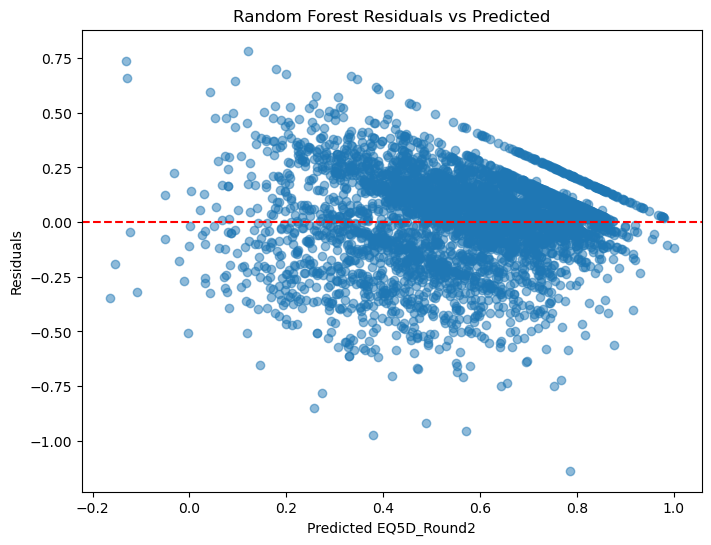

In [7]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted EQ5D_Round2")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals vs Predicted")
plt.show()


XGBoost

In [6]:

import xgboost as xgb
X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [8]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Parameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 1.0],
    'colsample_bytree': [0.5, 1.0]
}

# Base model
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    scoring='r2', 
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=   7.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  15.7s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  16.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5; total time=  16.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5; total time=  27.6s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.5; total time=  29.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=  38.3s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=1.0; total time=  42.1s
[CV] END 

In [9]:
y_pred = best_xgb_reg.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.44534343157190004
RMSE: 0.04126151910601396


Linear Regression to Neural Network 

In [7]:
print("Min:", df['EQ5D_Round2'].min())
print("Max:", df['EQ5D_Round2'].max())


Min: -0.594
Max: 1.0


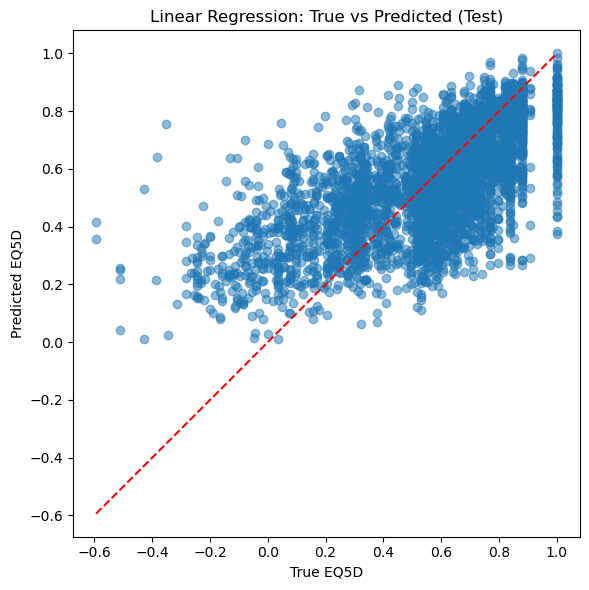

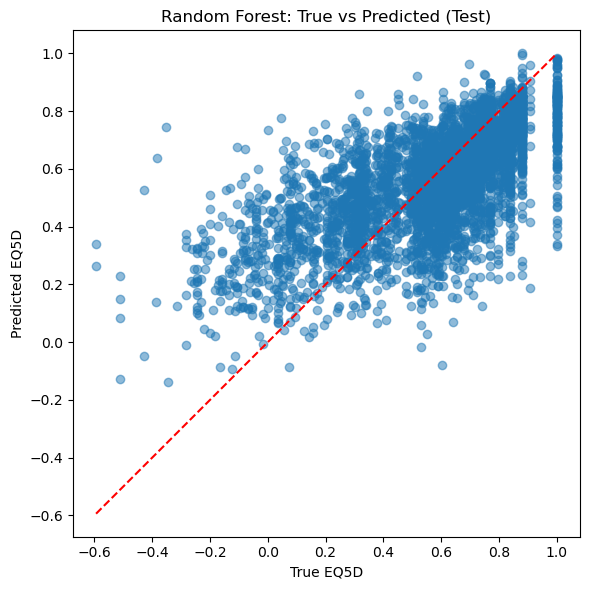

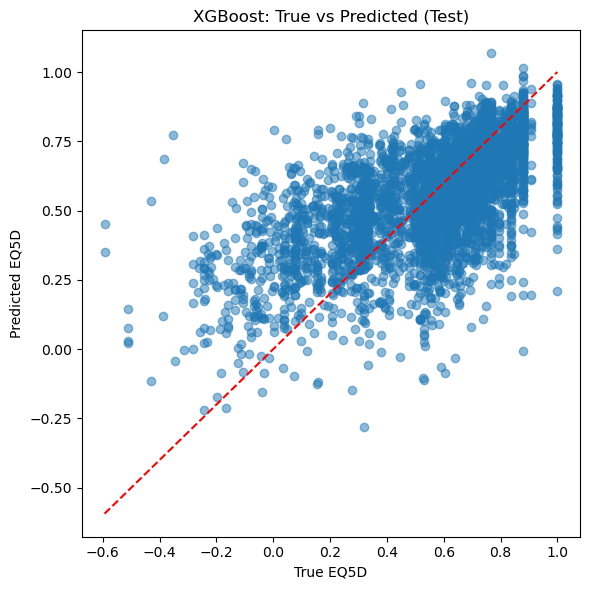

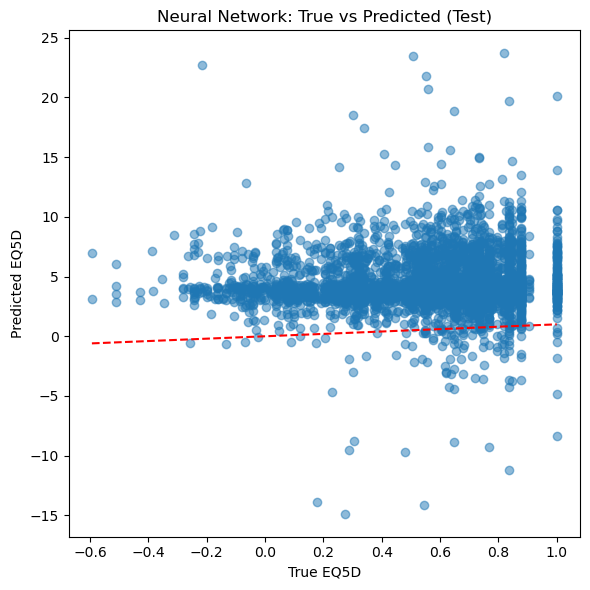


=== Model Performance ===
               Model  MSE Train   MSE Test    R2 Train     R2 Test
0  Linear Regression   0.041985   0.041222    0.444187    0.445879
1      Random Forest   0.006109   0.042255    0.919132    0.431990
2            XGBoost   0.020181   0.044299    0.732842    0.404516
3     Neural Network  18.882920  20.047701 -248.977359 -268.490540


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X=full.drop(['EQ5D_Round2','SID'], axis=1)
y=full['EQ5D_Round2']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

# 6️⃣ Loop: Train, predict, evaluate, plot
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test
    })

    # Plot: True vs Predicted (Test)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True EQ5D')
    plt.ylabel('Predicted EQ5D')
    plt.title(f"{name}: True vs Predicted (Test)")
    plt.tight_layout()
    plt.show()

# results df
results_df = pd.DataFrame(results)
print("\n=== Model Performance ===")
print(results_df)

Grid Search

In [8]:
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10]
    },
    'Lasso': {
        'alpha': [0.01, 0.1, 1]
    }
}


base_models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'Linear Regression': LinearRegression()
}


results = {}

for name, model in base_models.items():
    print(f"Running {name}...")
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        # For Linear Regression: no grid search
        model.fit(X_train, y_train)
        best_model = model
        best_params = 'N/A'

    # Evaluate on Train
    y_train_pred = best_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate on Test
    y_test_pred = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[name] = {
        'Best Params': best_params,
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test
    }


results_df = pd.DataFrame(results).T
print(results_df)

Running Random Forest...
Running XGBoost...
Running Neural Network...
Running Ridge...
Running Lasso...
Running Linear Regression...
                                                 Random Forest  \
Best Params  {'max_depth': 10, 'min_samples_split': 2, 'n_e...   
MSE Train                                             0.028858   
MSE Test                                              0.040982   
R2 Train                                              0.617968   
R2 Test                                               0.449095   

                                                       XGBoost  \
Best Params  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
MSE Train                                             0.039459   
MSE Test                                              0.039966   
R2 Train                                              0.477633   
R2 Test                                               0.462755   

                                                Neural Network          R

In [9]:
results_df = pd.DataFrame(results).T
print(results_df)

                                                         Best Params  \
Random Forest      {'max_depth': 10, 'min_samples_split': 2, 'n_e...   
XGBoost            {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
Neural Network     {'activation': 'tanh', 'alpha': 0.0001, 'hidde...   
Ridge                                                  {'alpha': 10}   
Lasso                                                {'alpha': 0.01}   
Linear Regression                                                N/A   

                  MSE Train  MSE Test  R2 Train   R2 Test  
Random Forest      0.028858  0.040982  0.617968  0.449095  
XGBoost            0.039459  0.039966  0.477633  0.462755  
Neural Network      0.07529  0.074732  0.003294 -0.004584  
Ridge              0.041999  0.041189  0.444006  0.446316  
Lasso              0.044528  0.043119  0.410528  0.420376  
Linear Regression  0.041985  0.041222  0.444187  0.445879  


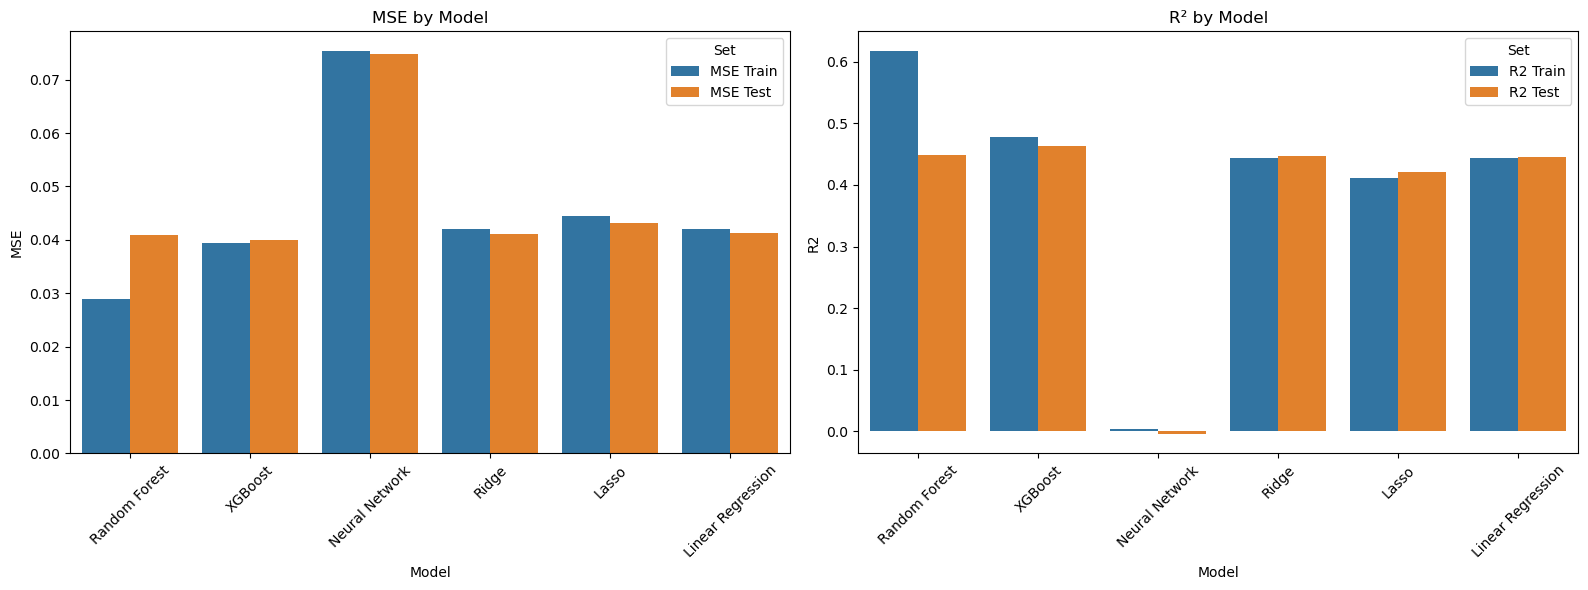

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt



mse_df = results_df.reset_index().melt(
    id_vars='index',
    value_vars=['MSE Train', 'MSE Test'],
    var_name='Set',
    value_name='MSE'
)
mse_df = mse_df.rename(columns={'index': 'Model'})


r2_df = results_df.reset_index().melt(
    id_vars='index',
    value_vars=['R2 Train', 'R2 Test'],
    var_name='Set',
    value_name='R2'
)
r2_df = r2_df.rename(columns={'index': 'Model'})

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MSE plot
sns.barplot(data=mse_df, x='Model', y='MSE', hue='Set', ax=axes[0])
axes[0].set_title('MSE by Model')
axes[0].tick_params(axis='x', rotation=45)

# R² plot
sns.barplot(data=r2_df, x='Model', y='R2', hue='Set', ax=axes[1])
axes[1].set_title('R² by Model')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

